In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('new_musicgenre_1.csv')
# df = pd.read_csv('new_musicgenre.csv')
#df=df.drop(['artist_name','track_name','mode','key'], axis=1)
df.dropna(inplace=True)

In [3]:
df
# df = df.sample(n=200, random_state=42)

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,...,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29
0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.792000,A#,0.115,...,-0.024040,-0.023934,0.043422,-0.039661,0.104210,0.029737,0.024613,-0.058177,-0.024832,0.076268
1,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,...,-0.008750,-0.011540,0.053136,-0.019956,0.082786,0.007387,0.041006,-0.013403,-0.024366,0.045563
2,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,...,-0.055081,-0.002115,0.120306,-0.034292,0.189147,0.040616,0.014718,0.069646,-0.008048,0.093286
3,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,...,0.022370,-0.044748,0.084666,-0.029087,0.185704,0.022386,0.081913,-0.043270,-0.026251,0.092824
4,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,...,0.000217,-0.000065,0.020838,-0.031464,0.086968,-0.002748,0.038952,-0.093933,-0.047314,0.058248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,Night Lovell,Barbie Doll,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,...,0.015930,0.009827,0.047404,-0.040572,0.091229,-0.003564,0.031872,-0.047867,-0.025976,0.065983
49995,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.000000,C#,0.119,...,-0.003088,-0.001245,0.028397,-0.023560,0.055969,0.009426,0.022210,-0.010152,-0.007887,0.029720
49996,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,...,-0.032327,0.024302,0.027017,-0.034411,0.096504,0.033279,-0.007992,-0.031349,-0.007531,0.044783
49997,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,...,0.009928,0.007898,0.018556,-0.025699,0.082229,0.023184,0.026941,-0.063422,-0.026153,0.037514


In [4]:
#remove the rows which duration<0
df = df[df['duration_ms'] >= 0]

#remove the nan value
df.replace("?", np.nan, inplace=True)

C:\Users\22848\AppData\Local\Temp\ipykernel_34216\587371546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("?", np.nan, inplace=True)


In [5]:
# X = df.drop(columns=["music_genre"], axis=1)
X = df.drop(columns=["music_genre","artist_name","track_name","key","mode"], axis=1)
y = df["music_genre"]
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['music_genre'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [7]:
def model_evaluate(model):
    model.fit(X_train,y_train)
    acc=model.score(X_test,y_test)
    
    print("Model Name",model)
    print("Acuuracy",acc)

In [8]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


# svm=SVC(kernel='rbf',probability=True,C=34.92860778581675, gamma=0.00166818064295124)
# et=ExtraTreesClassifier(max_depth= 20, max_features='sqrt', min_samples_leaf=5, min_samples_split=14, n_estimators=392)
# rf=RandomForestClassifier(bootstrap='True', max_depth=45,max_features=0.10356536954601347, max_leaf_nodes=28, min_samples_leaf=4, min_samples_split=8, n_estimators=123,n_jobs=-1)
# xgb=XGBClassifier(random_state=5666,n_jobs=-1, colsample_bytree=0.4896860157495544, learning_rate=0.22761029543445202, max_depth=3, min_child_weight=9, n_estimators=75, reg_alpha=0.001524408267039845, reg_lambda=0.0004817519111513194, subsample=0.38499511705560535)

# models=[svm,et,rf,xgb]

# for model in models:
#     model_evaluate(model)

In [9]:
base_models = [
               ('rf', RandomForestClassifier(bootstrap=True, max_depth=41, max_features=0.1, max_leaf_nodes=30, min_samples_leaf=10, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=6, oob_score=True)), 
               ('et', ExtraTreesClassifier(max_depth=37, max_features='sqrt', min_samples_leaf=8, min_samples_split=10, n_estimators=394)), 
               ('xgb', XGBClassifier(random_state=5666, n_jobs=-1, 
                    colsample_bytree=0.278504689512848, 
                    learning_rate=0.30172029821534907, 
                    max_depth=4, min_child_weight=5, 
                    n_estimators=78, reg_alpha=1.2105649466838027e-05, 
                    reg_lambda=2.506296724099989e-08, subsample=0.5643552004262644)),
               ('svm',SVC(kernel='rbf',probability=True,C=11.802866704748961, gamma=0.0065306926515463016))]

# define the meta model
meta_model = XGBClassifier(n_jobs=-1,random_state=454)

# define the stacking ensemble
stacking_ensemble = StackingClassifier(estimators=base_models, final_estimator=meta_model)

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical


param_dist = {
    'final_estimator__learning_rate': Real(0.01, 1.0, prior='log-uniform'),
    'final_estimator__max_depth': Integer(1, 10),
    'final_estimator__n_estimators': Integer(10, 1000),
    'final_estimator__subsample': Real(0.1, 1.0, prior='uniform'),
    'final_estimator__min_child_weight': Integer(1, 10),
    'final_estimator__reg_alpha': Real(1e-9, 1.0, prior='log-uniform'),
    'final_estimator__reg_lambda': Real(1e-9, 1.0, prior='log-uniform')
}



# perform Bayesian optimization with TPE on the meta model hyperparameters
bayes_cv_tuner = BayesSearchCV(
    estimator=stacking_ensemble,
    search_spaces=param_dist,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    n_iter=50,
    verbose=1,
    refit=True,
    random_state=123
)

# fit the model
bayes_cv_tuner.fit(X_train, y_train)

# evaluate the best model
best_model = bayes_cv_tuner.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [15]:



# access the best hyperparameters
best_hyperparams = bayes_cv_tuner.best_params_

# print the best hyperparameters
print("Tuned Hyperparameters for Meta-Learner:")
for param, value in best_hyperparams.items():
    print(param, ":", value)


Tuned Hyperparameters for Meta-Learner:
final_estimator__learning_rate : 0.01
final_estimator__max_depth : 4
final_estimator__min_child_weight : 10
final_estimator__n_estimators : 1000
final_estimator__reg_alpha : 0.24054997434241324
final_estimator__reg_lambda : 2.7463453047643203e-09
final_estimator__subsample : 0.5709584137512536


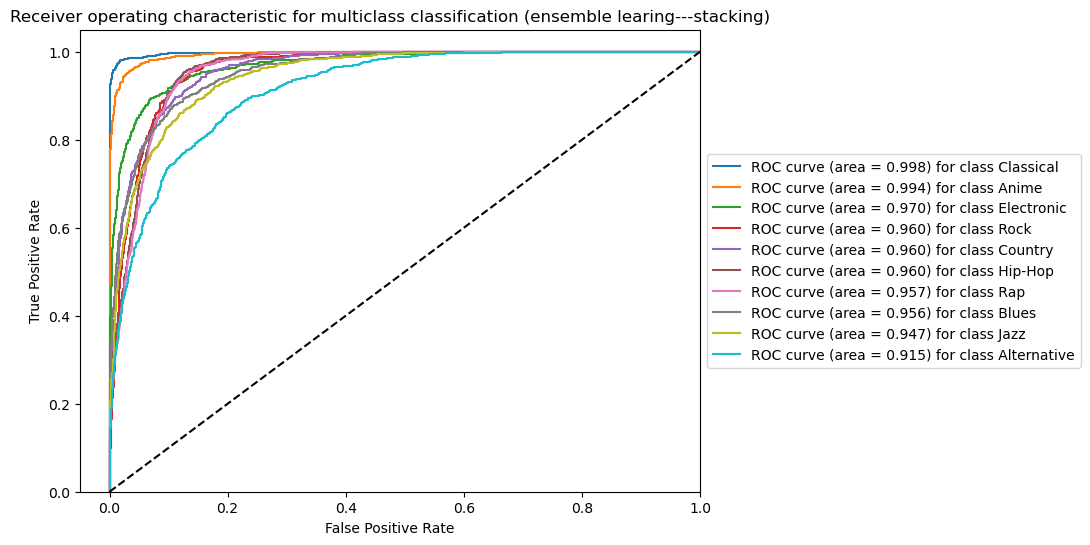

In [26]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for each class
y_proba = best_model.predict_proba(X_test)
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    y_test_binary = np.zeros_like(y_test)
    y_test_binary[y_test == i] = 1
    y_proba_binary = y_proba[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_binary, y_proba_binary)
    roc_auc[i] = auc(fpr[i], tpr[i])

sorted_auc = sorted(roc_auc.items(), key=lambda x: x[1], reverse=True)

label_dict = {'0': 'Alternative', '1': 'Anime', '2': 'Blues', '3': 'Classical', '4': 'Country',
              '5': 'Electronic', '6': 'Hip-Hop', '7': 'Jazz', '8': 'Rap', '9': 'Rock'}

plt.figure(figsize=(8, 6))

for i, (class_index, auc_value) in enumerate(sorted_auc):
    label = 'ROC curve (area = %0.3f) for class %s' % (auc_value, label_dict[str(class_index)])
    plt.plot(fpr[class_index], tpr[class_index], label=label)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclass classification (ensemble learing---stacking)')

handles, labels = plt.gca().get_legend_handles_labels()
sorted_legend_indices = [idx for idx, _ in sorted(enumerate(labels), key=lambda x: sorted_auc[x[0]][1])]
handles = [handles[i] for i in sorted_legend_indices]
labels = [labels[i] for i in sorted_legend_indices]
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("stacking_roc_curve_2.svg", format="svg", bbox_inches='tight')
plt.show()


In [27]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=label_dict.values())

# Print the classification report
print(report)

              precision    recall  f1-score   support

 Alternative       0.61      0.51      0.56       842
       Anime       0.90      0.90      0.90       809
       Blues       0.71      0.66      0.69       815
   Classical       0.96      0.94      0.95       797
     Country       0.69      0.70      0.70       832
  Electronic       0.78      0.76      0.77       804
     Hip-Hop       0.62      0.60      0.61       849
        Jazz       0.65      0.66      0.65       803
         Rap       0.58      0.63      0.61       758
        Rock       0.61      0.74      0.67       803

    accuracy                           0.71      8112
   macro avg       0.71      0.71      0.71      8112
weighted avg       0.71      0.71      0.71      8112



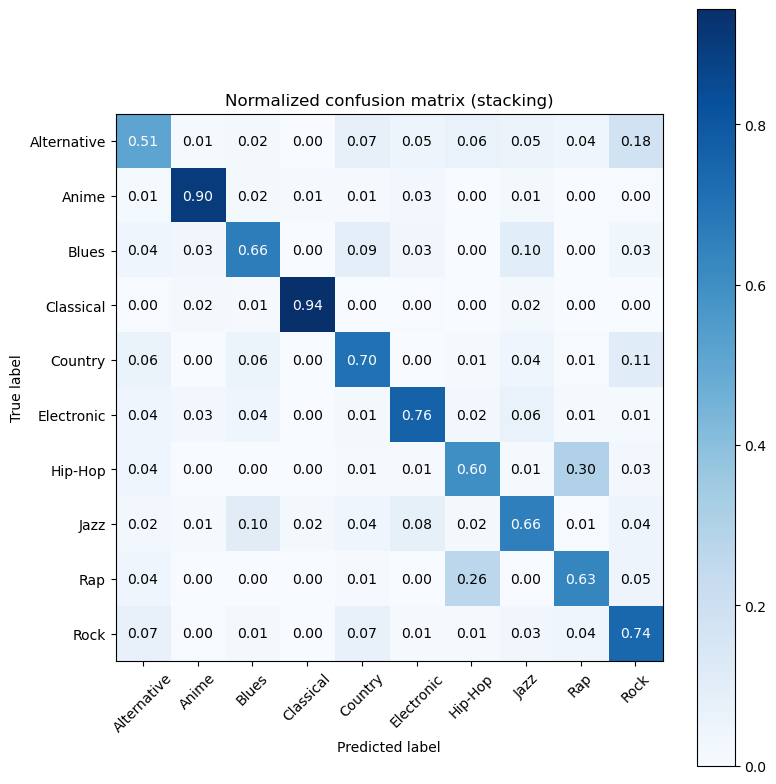

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Define class names
classes = ['Alternative', 'Anime', 'Blues', 'Classical', 'Country',
           'Electronic', 'Hip-Hop', 'Jazz', 'Rap', 'Rock']

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized confusion matrix (stacking)')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = '.2f'
thresh = cm_norm.max() / 2.
for i, j in np.ndindex(cm_norm.shape):
    plt.text(j, i, format(cm_norm[i, j], fmt),
             ha="center", va="center",
             color="white" if cm_norm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig("stacking_confusion_matrix.svg", format="svg", bbox_inches='tight')
plt.show()